# Hieu Nghiem
#### CS5783 Assignment1

First, importing the libraries which we will use:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

*# QUESTION 1*

Plot training and testing data. 

The plot below indicates that the relationship between X and Y for both training and testing set is not linear. 

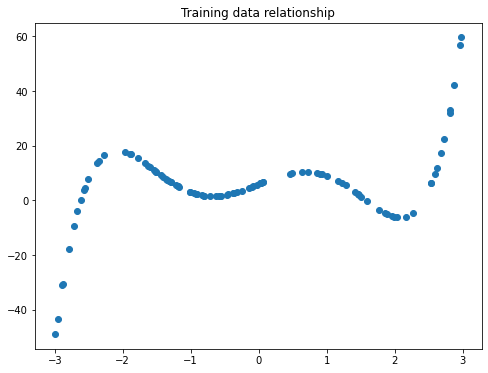

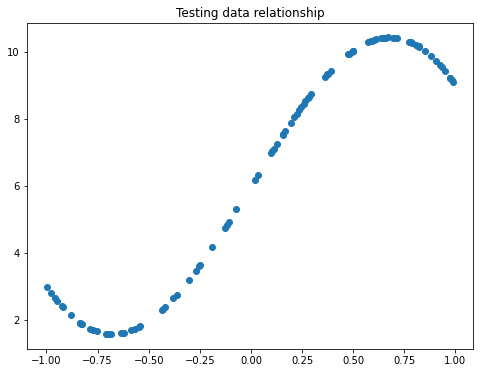

In [4]:
#load data
X = np.load("x_train.npy")
Y = np.load("y_train.npy")
X_test = np.load("x_test.npy")
Y_test = np.load("y_test.npy")

plt.rcParams['figure.figsize'] = (8 , 6)
plt.scatter(X, Y)
plt.title('Training data relationship')
plt.show()

plt.rcParams['figure.figsize'] = (8 , 6)
plt.scatter(X_test, Y_test)
plt.title('Testing data relationship')
plt.show()

Now we will try to implement a linear regression model. For this step, I will: 

- Define cost function - using formula on P16 Lecture 3. This function will return the cost and the prediction error for every theta

- Define gradient descent function - using update rule on P23 Lecture 3. This function will return theta after every iteration

- Define prediction function - simply return y_predicted with values of x and theta


In [5]:
def cost_function(x,y,t):
    cost = np.dot(np.dot(x, t.T) - y, np.dot(x, t.T) - y) * (1/2)
    error = np.dot(x, t.T) - y
    return cost, error

def gradient_descent(x,y,t,a, iteration):
    for i in range(iteration):
        c, e = cost_function(x, y, t)
        t = t - (a  * np.dot(x.T, e))
    return t

def prediction(x,t):
    y_predicted = np.dot(x, t.T)
    return y_predicted


IMPLEMENTATION AND PERFORM PREDICTION

For running code with different basis function, please de-comment / comment the code block ##BASIS FUNCTION (which has 6 line of code) as below:
- If use X (simple model): use line 1 and 4, comment on line 2 3 5 6
- If use X^2: use line 2 and 5, comment on line 1 3 4 6
- If use X^3: use line 3 and 6, comment on line 1 2 4 5

Final theta value: [5.60573724 5.69078248]
Prediction error (mean square error): 169.33472639737593


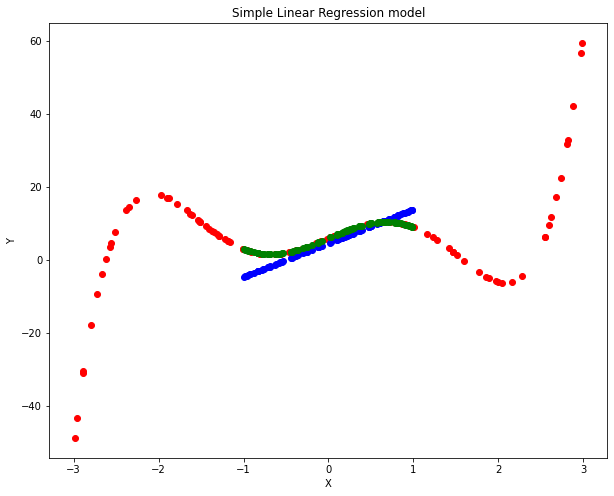

In [7]:
#Convert to dataframe and add basis function feature
X = pd.DataFrame(X, columns=['x'] )
Y = pd.DataFrame(Y, columns=['y'])['y']
X['x^2'] = X['x'] * X['x']
X['x^3'] = X['x'] * X['x'] * X['x']
X_test = pd.DataFrame(X_test, columns=['x'] )
Y_test = pd.DataFrame(Y_test, columns=['y'])['y']
X_test['x^2'] = X_test['x'] * X_test['x']
X_test['x^3'] = X_test['x'] * X_test['x'] * X_test['x']

##BASIS FUNCTION (line 1 to 6)
X = X[['x']]
# X = X[['x', 'x^2']]
# X = X[['x', 'x^2', 'x^3']]
X_test = X_test[['x']]
# X_test = X_test[['x', 'x^2']]
# X_test = X_test[['x', 'x^2', 'x^3']]

#Normalization by subtracting mean and divided by standard deviation
X = (X - X.mean()) / X.std()
X_test = (X_test - X_test.mean()) / X_test.std()

#add 1 more column for bias value
X = np.c_[np.ones(X.shape[0]), X] 
X_test = np.c_[np.ones(X_test.shape[0]), X_test] 

#parameter of the model:
a = 0.001
data_size = Y.size
#iteration
iteration = 1000
#theta
t = np.zeros(X.shape[1])

#Run gradient descent and cost function to find final theta and cost
t = gradient_descent(X, Y, t, a, iteration)
finalCost, error = cost_function(X, Y, t)
print('Final theta value:', t)
print('Prediction error (mean square error):', finalCost*2/data_size)

#Prediction on test data
Y_prediction = prediction(X_test,t)

#Reload dataset to plot
X = np.load("x_train.npy")
y = np.load("y_train.npy")
X_test = np.load("x_test.npy")
Y_test = np.load("y_test.npy")

#Plotting the model
plt.rcParams['figure.figsize'] = (10, 8)
plt.title('Simple Linear Regression model')
plt.scatter(X,Y, color='red')
plt.scatter(X_test, Y_prediction, ls='-', color='blue')
plt.scatter(X_test,Y_test, color='green')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


*# QUESTION 2*

Use simple model in Q1:

Final theta value: [38.15714286  2.60936371  4.18877713  0.50473755  6.69492157  1.15834822
 -0.89176102 -0.34147193 -0.9178142   1.21154324  0.80110827  1.22174215]
Prediction error (mean square error): 9.352750812533968


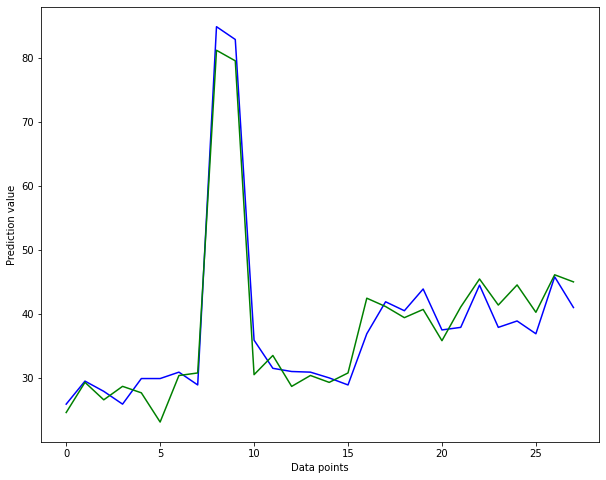

In [8]:
data = pd.read_csv('Assignment1_Q2_Data.csv')
#data X contain all feature for train
X = data[['Local Price', 'Bathrooms', 'Land Area', 'Living area',
       '# Garages', '# Rooms', '# Bedrooms', 'Age of home',
       'Construction type', 'Architecture type', '# Fire places']]

#Normalization by subtracting mean and divided by standard deviation
X = (X - X.mean()) / X.std()
#add 1 more column for bias value
X = np.c_[np.ones(X.shape[0]), X] 
#data y
y = data['Price (1000$)']

#parameter of the model:
a = 0.001
data_size = y.size
#iteration
iteration = 1000
#theta
t = np.zeros(X.shape[1])

#Run gradient descent and cost function to find final theta and cost
t = gradient_descent(X, y, t, a, iteration)
finalCost, error = cost_function(X, y, t)
print('Final theta value:', t)
print('Prediction error (mean square error):', finalCost*2/data_size)

#Plotting for comparison between y and predict_y
predict_y = prediction(X,t)
plt.plot(y, color='blue')
plt.plot(predict_y, color='green')
plt.xlabel('Data points')
plt.ylabel('Prediction value')
plt.show()

Find correlation between X and predict_Y and Y to see what are the most important features and least important features

In [9]:
feature_list = ['Local Price', 'Bathrooms', 'Land Area', 'Living area',
       '# Garages', '# Rooms', '# Bedrooms', 'Age of home',
       'Construction type', 'Architecture type', '# Fire places']
X = data[['Local Price', 'Bathrooms', 'Land Area', 'Living area',
       '# Garages', '# Rooms', '# Bedrooms', 'Age of home',
       'Construction type', 'Architecture type', '# Fire places']]

predict_y = pd.DataFrame(predict_y, columns=['y'])['y']
for f in feature_list:
    print('Correlation between predict_y and', f,  predict_y.corr(X[f], method='kendall'))


print('\n')


for f in feature_list:
    print('correlation between y and', f,  y.corr(X[f], method='kendall'))

Correlation between predict_y and Local Price 0.7506631299734747
Correlation between predict_y and Bathrooms 0.7230169050866526
Correlation between predict_y and Land Area 0.49534349948783823
Correlation between predict_y and Living area 0.7101088944026925
Correlation between predict_y and # Garages 0.4136395257687919
Correlation between predict_y and # Rooms 0.5093687109152628
Correlation between predict_y and # Bedrooms 0.4428119602683544
Correlation between predict_y and Age of home -0.25139634595843136
Correlation between predict_y and Construction type 0.03994105363369855
Correlation between predict_y and Architecture type -0.020601048104984192
Correlation between predict_y and # Fire places 0.3741578617526924


correlation between y and Local Price 0.7583613569718661
correlation between y and Bathrooms 0.680784170118376
correlation between y and Land Area 0.487937410382764
correlation between y and Living area 0.49264118839353266
correlation between y and # Garages 0.432425855109

Model with Local Price and Bathrooms

In [10]:
X = data[['Local Price', 'Bathrooms']]

#Normalization by subtracting mean and divided by standard deviation
X = (X - X.mean()) / X.std()
#add 1 more column for bias value
X = np.c_[np.ones(X.shape[0]), X] 
#data y
y = data['Price (1000$)']

#parameter of the model:
a = 0.001
data_size = y.size
#iteration
iteration = 1000
#theta
t = np.zeros(X.shape[1])

#Run gradient descent and cost function to find final theta and cost
t = gradient_descent(X, y, t, a, iteration)
finalCost, error = cost_function(X, y, t)
print('Final theta value:', t)
print('Prediction error (mean square error):', finalCost*2/data_size)

Final theta value: [38.15714286  6.84236895  7.06409294]
Prediction error (mean square error): 17.82024292906855


Model with Construction type and Architecture type removed

In [11]:
X = data[['Local Price', 'Bathrooms', 'Land Area', 'Living area',
       '# Garages', '# Rooms', '# Bedrooms', 'Age of home',
       '# Fire places']]

#Normalization by subtracting mean and divided by standard deviation
X = (X - X.mean()) / X.std()
#add 1 more column for bias value
X = np.c_[np.ones(X.shape[0]), X] 
#data y
y = data['Price (1000$)']

#parameter of the model:
a = 0.001
data_size = y.size
#iteration
iteration = 1000
#theta
t = np.zeros(X.shape[1])

#Run gradient descent and cost function to find final theta and cost
t = gradient_descent(X, y, t, a, iteration)
finalCost, error = cost_function(X, y, t)
print('Final theta value:', t)
print('Prediction error (mean square error):', finalCost*2/data_size)

Final theta value: [38.15714286  3.58987729  3.82409656  0.22903811  6.45282679  1.07998927
 -0.39679781 -0.78556299 -0.94276587  0.9789259 ]
Prediction error (mean square error): 10.819509639599946


*QUESTION 3*

In [17]:
# Calculate weight diagonal Matrix W used in calculation of predictions
def get_WeightMatrix(query_point, training_examples, Bandwidth):
# M is the No of training examples
  M = training_examples.shape[0]
# Initializing W as an identity matrix
  W = np.mat(np.eye(M))
# calculating element of diagonal in W
  for i in range(M):
    xi = training_examples[i]
    denominator = (-2 * Bandwidth * Bandwidth)
    W[i, i] = np.exp(np.dot((xi-query_point), (xi-query_point).T)/denominator)
    return W


In [18]:
# function to make predictions
def predict(training_examples, Y, query_x, Bandwidth):
  M = training_examples.shape[0]
  all_ones = np.ones((M, 1))
  X_ = np.hstack((training_examples, all_ones))
  qx = np.mat([query_x, 1])
  W = get_WeightMatrix(qx, X_, Bandwidth)
  # calculating parameter theta
  theta = np.linalg.pinv(X_.T*(W * X_))*(X_.T*(W * Y))
  # calculating predictions
  pred = np.dot(qx, theta)
  return theta, pred


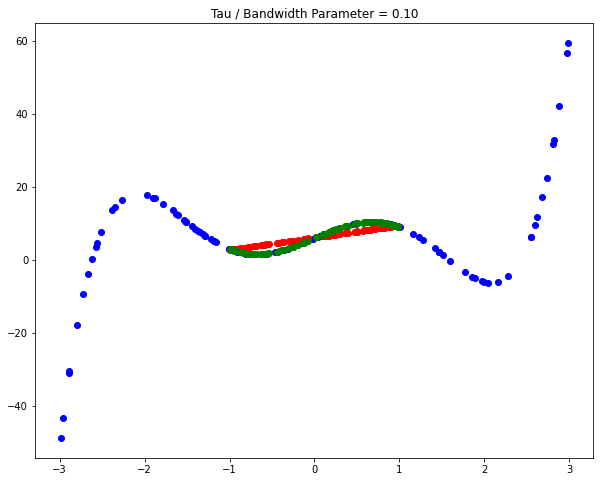

In [26]:
A = np.load("x_train.npy")
B = np.load("y_train.npy")
A_test = np.load("x_test.npy")
B_test = np.load("y_test.npy")

B = np.reshape(B,(B.size,1))
A_test = np.squeeze(A_test)


#Prediction with test dataset
Bandwidth = 0.1
Y_test = []
for query in A_test:
  theta, pred = predict(A, B, query, Bandwidth)
  Y_test.append(pred[0][0])

#Plotting

plt.rcParams['figure.figsize'] = (10 , 8)
plt.title("Tau / Bandwidth Parameter = %.2f" %Bandwidth)
plt.scatter(np.array(A), np.array(B), color = 'blue')
Y_test = np.array(Y_test)
plt.scatter(A_test, Y_test, color ='red')
plt.scatter(A_test, B_test, color ='green')
plt.show()
